In [1]:
import quandl 
import pandas as pd
import numpy as np

In [2]:
quandl.ApiConfig.api_key = 'CLLkrCizYyWS99o9FZwo'

In [3]:
tesla = quandl.get('WIKI/TSLA')
gm = quandl.get('WIKI/GM')


In [4]:
tesla.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0


In [5]:
gm.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0
2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0
2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0
2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0
2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0


In [6]:
import matplotlib.pyplot as plt

In [7]:
tesla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)

In [8]:
%matplotlib inline

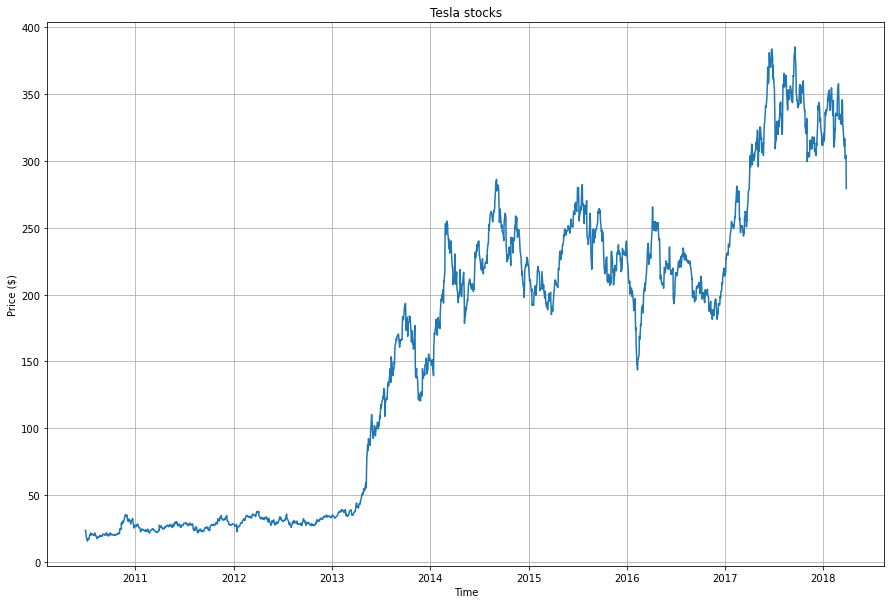

In [9]:
plt.figure(figsize=(15,10))
plt.plot(tesla.index,tesla['Adj. Close'])
plt.title("Tesla stocks")
plt.xlabel('Time')
plt.ylabel("Price ($)")
plt.grid('on')
plt.show()

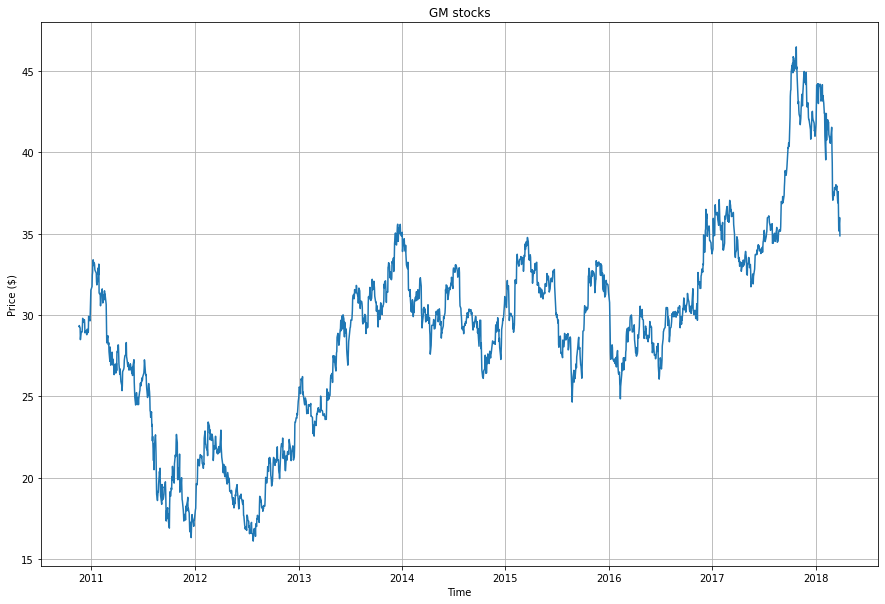

In [10]:
plt.figure(figsize=(15,10))
plt.plot(gm.index,gm['Adj. Close'])
plt.title("GM stocks")
plt.xlabel('Time')
plt.ylabel("Price ($)")
plt.grid('on')

<h1>Calculating the Market Capitalization of each firm</h1>

In [11]:
tesla_shares = {2018: 168e6, 2017: 162e6, 2016: 144e6, 2015: 128e6, 2014: 125e6, 2013: 119e6, 2012: 107e6, 2011: 100e6, 2010: 51e6}
gm_shares = {2018: 1.42e9, 2017: 1.50e9, 2016: 1.54e9, 2015: 1.59e9, 2014: 1.61e9, 2013: 1.39e9, 2012: 1.57e9, 2011: 1.54e9, 2010:1.50e9}

In [12]:
tesla['Year']= tesla.index.year

In [13]:
tesla.reset_index(level=0,inplace=True)

In [14]:
for i, year in enumerate(tesla['Year']):
    shares = tesla_shares.get(year)
    tesla.loc[i,'Cap'] = shares * tesla.loc[i,'Adj. Close']

In [15]:
tesla.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Year,Cap
0,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0,2010,1.218390e+09
1,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0,2010,1.215330e+09
2,2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0,2010,1.119960e+09
3,2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0,2010,9.792000e+08
4,2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0,2010,8.216100e+08


In [57]:
gm['Year'] = gm.index.year
gm.reset_index(level=0,inplace=True)
for i,year in enumerate(gm.Year):
    shares = gm_shares.get(year)
    gm.loc[i,'Cap'] = shares * gm.loc[i,'Adj. Close']

AttributeError: 'RangeIndex' object has no attribute 'year'

In [17]:
gm.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Year,Cap
0,2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,29.037259,29.294302,457044300.0,2010,4.394145e+10
1,2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,28.368948,29.354278,107842000.0,2010,4.403142e+10
2,2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,28.968714,29.200053,36650600.0,2010,4.380008e+10
3,2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,28.437493,28.488901,31170200.0,2010,4.273335e+10
4,2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,28.463197,28.685967,26138000.0,2010,4.302895e+10


In [18]:
cars = gm.merge(tesla,how='inner',on='Date')
cars.head()

,Date,Open_x,High_x,Low_x,Close_x,Volume_x,Ex-Dividend_x,Split Ratio_x,Adj. Open_x,Adj. High_x,...,Volume_y,Ex-Dividend_y,Split Ratio_y,Adj. Open_y,Adj. High_y,Adj. Low_y,Adj. Close_y,Adj. Volume_y,Year_y,Cap_y
0,2010-11-18,35.00,35.99,33.89,34.19,457044300.0,0.0,1.0,29.988317,30.836558,...,956100.0,0.0,1.0,30.67,30.74,28.9201,29.89,956100.0,2010,1.524390e+09
1,2010-11-19,34.15,34.50,33.11,34.26,107842000.0,0.0,1.0,29.260029,29.559912,...,1150500.0,0.0,1.0,30.16,31.37,29.7000,30.99,1150500.0,2010,1.580490e+09
2,2010-11-22,34.20,34.48,33.81,34.08,36650600.0,0.0,1.0,29.302870,29.542776,...,1529700.0,0.0,1.0,31.57,33.45,31.5000,33.40,1529700.0,2010,1.703400e+09
3,2010-11-23,33.95,33.99,33.19,33.25,31170200.0,0.0,1.0,29.088668,29.122940,...,1577800.0,0.0,1.0,33.29,35.68,32.1901,34.57,1577800.0,2010,1.763070e+09
4,2010-11-24,33.73,33.80,33.22,33.48,26138000.0,0.0,1.0,28.900170,28.960146,...,1425000.0,0.0,1.0,35.27,35.97,34.3340,35.47,1425000.0,2010,1.808970e+09


In [19]:
cars.rename(columns={'Cap_x':'GM_Cap','Cap_y':'Tesla_Cap'},inplace=True)

In [20]:
Market_Cap = cars[['Date','Tesla_Cap','GM_Cap']]

In [21]:
Market_Cap.head()

,Date,Tesla_Cap,GM_Cap
0,2010-11-18,1.524390e+09,4.394145e+10
1,2010-11-19,1.580490e+09,4.403142e+10
2,2010-11-22,1.703400e+09,4.380008e+10
3,2010-11-23,1.763070e+09,4.273335e+10
4,2010-11-24,1.808970e+09,4.302895e+10


In [22]:
Market_Cap[['Tesla_Cap','GM_Cap']] = Market_Cap[['Tesla_Cap','GM_Cap']]/1e9

In [23]:
Market_Cap.head()

,Date,Tesla_Cap,GM_Cap
0,2010-11-18,1.52439,43.941453
1,2010-11-19,1.58049,44.031417
2,2010-11-22,1.70340,43.800079
3,2010-11-23,1.76307,42.733352
4,2010-11-24,1.80897,43.028951


In [24]:
Market_Cap.set_index('Date',inplace=True)

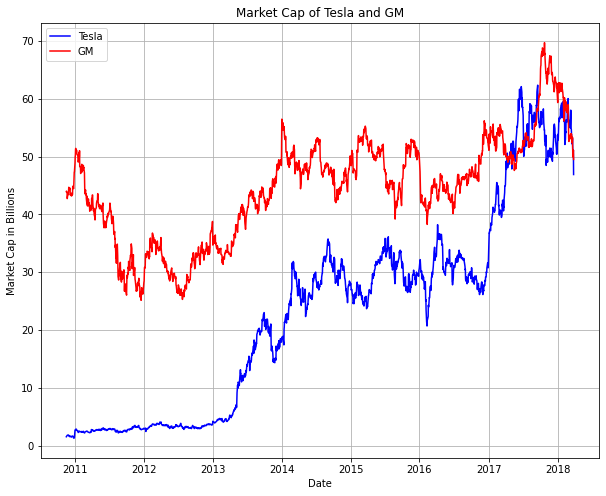

In [25]:
plt.figure(figsize=(10,8))
plt.plot(Market_Cap.index,Market_Cap.Tesla_Cap,'b-',label='Tesla')
plt.plot(Market_Cap.index,Market_Cap.GM_Cap,'r-',label='GM')
plt.xlabel('Date'); plt.ylabel('Market Cap in Billions')
plt.title("Market Cap of Tesla and GM")
plt.legend()
plt.grid('on')
plt.show()

In [26]:
start_date = cars.loc[np.min(np.where(cars['Tesla_Cap']>cars['GM_Cap'])),'Date']
end_date = cars.loc[np.max(np.where(cars['Tesla_Cap']>cars['GM_Cap'])),'Date']

In [27]:
print(f"Tesla's market cap was greater than GM's from {start_date} to {end_date}")

Tesla's market cap was greater than GM's from 2017-04-10 00:00:00 to 2018-03-23 00:00:00


In [28]:
import fbprophet as prophet

Importing plotly failed. Interactive plots will not work.


In [29]:
gm = gm.rename(columns={'Date':'ds','Cap':'y'})
gm['y'] = gm['y']/1e9

In [30]:
gm_prophet = prophet.Prophet(changepoint_prior_scale=0.15)
gm_prophet.fit(gm)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
len(gm)

1849

In [32]:
gm_forecast = gm_prophet.make_future_dataframe(periods=365*2,freq='D')

In [33]:
prediction = gm_prophet.predict(gm_forecast)

Text(0.5, 1.0, 'Market Cap forecast')

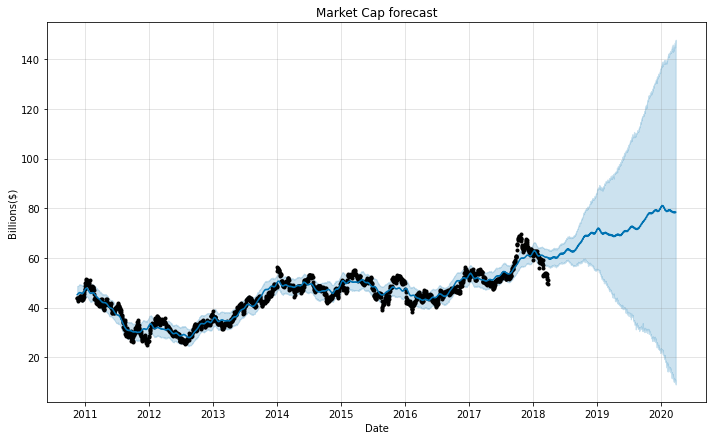

In [59]:
gm_prophet.plot(prediction,xlabel='Date',ylabel='Billions($)')
plt.title('Market Cap forecast')

In [35]:
data = pd.read_csv('multiTimeline.csv')

In [36]:
data.columns

Index(['Month', 'Search'], dtype='object')

In [37]:
data['Month'] = pd.to_datetime(data['Month'])

In [38]:
def plotting_changes(model,data,company):
  data['Month'] = pd.to_datetime(data['Month'])  
  changes = [pd.to_datetime(date) for date in model.changepoints]
  plt.figure(figsize=(10,8))
  plt.vlines(changes,ymin=0,ymax=100,colors='r', linewidth=0.6,linestyle='dashed',label='Changepoints')
  plt.plot(data.Month,data['Search'],label='Searches')
  plt.xlabel('Time')
  plt.ylabel('Trends')
  plt.title(f"{company} Market Cap changes based on trends")
  plt.legend()

In [39]:
tesla.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend',
       'Split Ratio', 'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close',
       'Adj. Volume', 'Year', 'Cap'],
      dtype='object')

In [40]:
tesla.rename(columns={'Date':'ds','Cap':'y'},inplace=True)
tesla.y = tesla.y/1e9
tesla_prophet = prophet.Prophet(changepoint_prior_scale=0.15)
tesla_prophet.fit(tesla)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
forecast_time = tesla_prophet.make_future_dataframe(periods=365*2,freq='D')
forecast = tesla_prophet.predict(forecast_time)

Text(0.5, 1.0, 'Market Cap forecast')

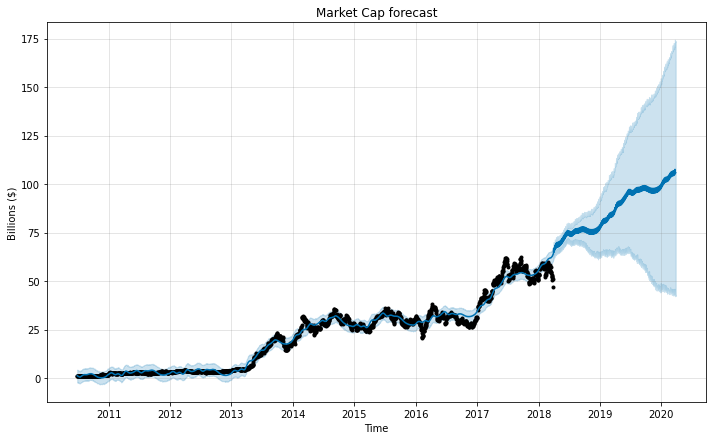

In [60]:
tesla_prophet.plot(forecast,xlabel='Time',ylabel='Billions ($)')
plt.title('Market Cap forecast')

In [43]:
search_data = pd.read_csv('multiTimeline-tesla.csv')
search_data['Month'] = pd.to_datetime(search_data['Month'])

<h2> Plotting how the change points could be influenced by public opinion </h2>

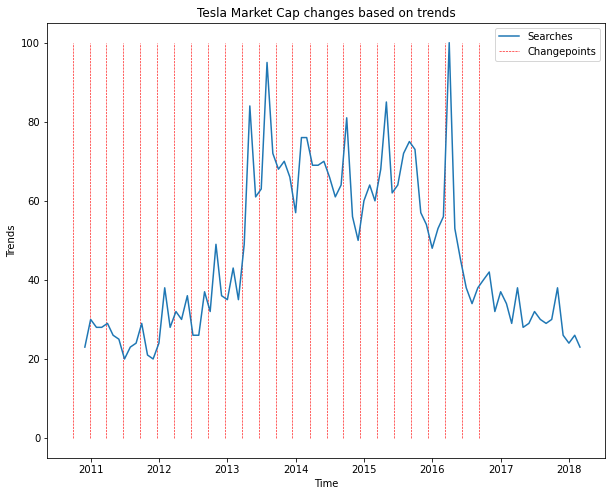

In [44]:
plotting_changes(tesla_prophet,search_data,'Tesla')

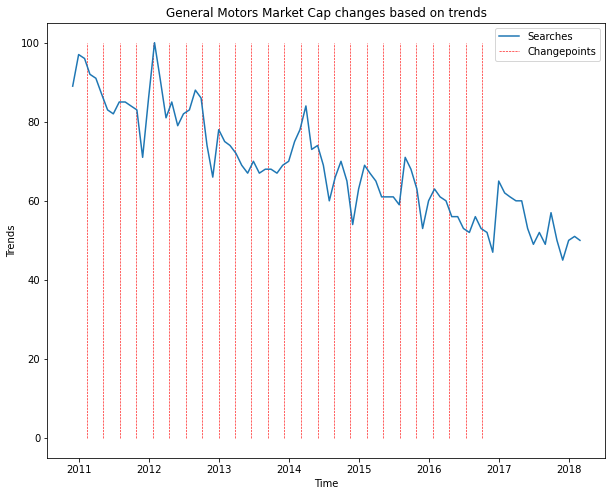

In [45]:
plotting_changes(gm_prophet,data,'General Motors')

<h2> Visualizing the trend in the data </h2>

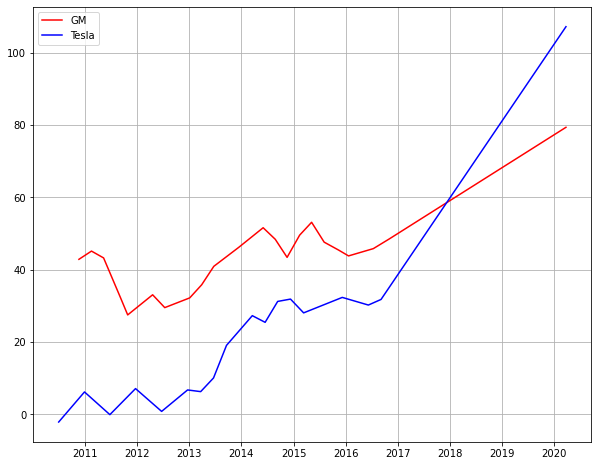

In [46]:
plt.figure(figsize=(10,8))
plt.plot(prediction.ds,prediction.trend,color='r',label="GM")
plt.plot(forecast.ds,forecast.trend,color='b',label='Tesla')
plt.grid('on')
plt.legend()

<h1> Plotting the Market Cap estimate for both </h1>

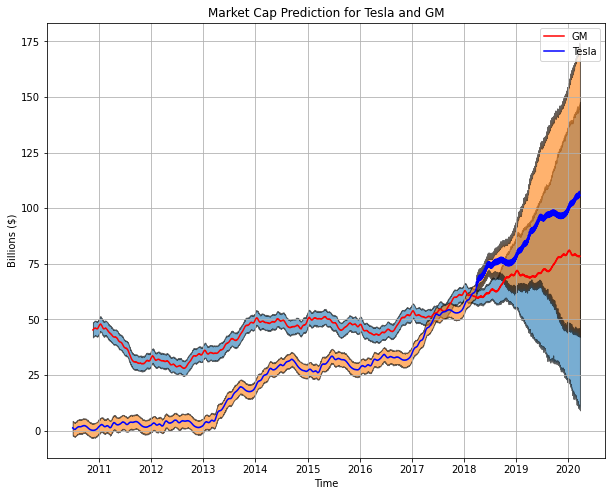

In [55]:
plt.figure(figsize=(10,8))
plt.plot(prediction.ds,prediction.yhat,color='r',label="GM")
plt.fill_between(prediction.ds,prediction.yhat_lower,prediction.yhat_upper,alpha=0.6,edgecolor='k')
plt.plot(forecast.ds,forecast.yhat,color='b',label='Tesla')
plt.fill_between(forecast.ds,forecast.yhat_lower,forecast.yhat_upper,alpha=0.6,edgecolor='k')
plt.title('Market Cap Prediction for Tesla and GM');plt.grid('on');plt.xlabel('Time')
plt.ylabel("Billions ($)")
plt.legend()